This notebook was generated as part of a series of classes I took on the Coursera website for data science. In particular this was performed as a end of class project to demonstrate our understanding of the machine learning methods discussed in the course. I have modified the notebook to fucntion as a demonstration of some of my knowledge of data science. 

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [52]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [53]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'
df = pd.read_csv(path) 

### Load Data From CSV File  

In [54]:
df = pd.read_csv('loan_train.csv')
df.rename(columns={'Principal':'principal', 'Gender':'gender'}, inplace=True)
df['loan_status'] = df['loan_status'].apply(lambda x: x.lower() if isinstance(x, object) else x)
df['education'] = df['education'].apply(lambda x: x.lower() if isinstance(x, object) else x)
df['education'] = df['education'].apply(lambda x: 'bachelor' if x == 'bechalor' else x)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,0,0,paidoff,1000,30,9/8/2016,10/7/2016,45,high school or below,male
1,2,2,paidoff,1000,30,9/8/2016,10/7/2016,33,bachelor,female
2,3,3,paidoff,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,paidoff,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,paidoff,1000,30,9/9/2016,10/8/2016,29,college,male


In [55]:
df.shape

(346, 10)

### Convert to date time object 

In [56]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,0,0,paidoff,1000,30,2016-09-08,2016-10-07,45,high school or below,male
1,2,2,paidoff,1000,30,2016-09-08,2016-10-07,33,bachelor,female
2,3,3,paidoff,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,paidoff,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,paidoff,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [57]:
df['loan_status'].value_counts()

paidoff       260
collection     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [58]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\John\Anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         155 KB  anaconda
    conda-4.6.14               |           py37_0         2.1 MB  anaconda
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                       conda-forge --> anaconda
  conda                                         conda-forge --> anaconda




conda-4.6.14         | 2.1 MB    |            |   0% 
conda-4.6.14         | 2.1 MB    |            |   1% 
conda-4.6.14         | 2.1 MB    | #3         |  13% 
conda-4.6.14         | 2.1 MB    | ####

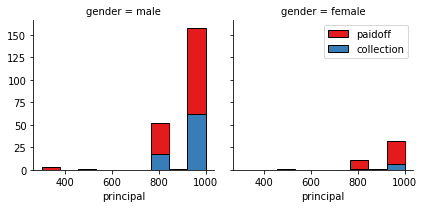

In [59]:
import seaborn as sns

bins=np.linspace(df.principal.min(), df.principal.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

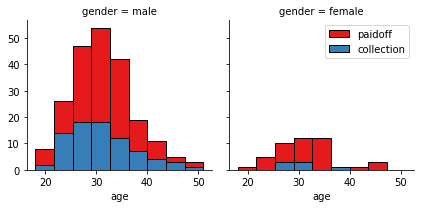

In [60]:
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

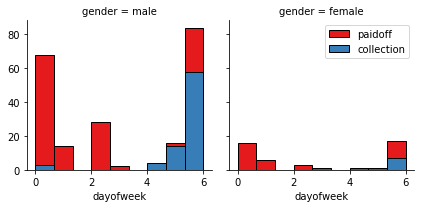

In [61]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [62]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,0,0,paidoff,1000,30,2016-09-08,2016-10-07,45,high school or below,male,3,0
1,2,2,paidoff,1000,30,2016-09-08,2016-10-07,33,bachelor,female,3,0
2,3,3,paidoff,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,paidoff,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,paidoff,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [63]:
df.groupby(['gender'])['loan_status'].value_counts(normalize=True)

gender  loan_status
female  paidoff        0.865385
        collection     0.134615
male    paidoff        0.731293
        collection     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [64]:
df['gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,0,0,paidoff,1000,30,2016-09-08,2016-10-07,45,high school or below,0,3,0
1,2,2,paidoff,1000,30,2016-09-08,2016-10-07,33,bachelor,1,3,0
2,3,3,paidoff,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,paidoff,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,paidoff,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [65]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
bachelor              paidoff        0.750000
                      collection     0.250000
college               paidoff        0.765101
                      collection     0.234899
high school or below  paidoff        0.741722
                      collection     0.258278
master or above       collection     0.500000
                      paidoff        0.500000
Name: loan_status, dtype: float64

#### Features before One Hot Encoding

In [66]:
df[['principal','terms','age','gender','education']].head()

,principal,terms,age,gender,education
0,1000,30,45,0,high school or below
1,1000,30,33,1,bachelor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### One hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [67]:

Feature=df[['principal','terms','age','gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['master or above'], axis = 1,inplace=True)
Feature.head()


,principal,terms,age,gender,weekend,bachelor,college,high school or below
0,1000,30,45,0,0,0,0,1
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,1,0
3,1000,30,28,1,1,0,1,0
4,1000,30,29,0,1,0,1,0


### Feature selection

Lets defind feature sets, X:

In [68]:
X = Feature
X[0:5]

,principal,terms,age,gender,weekend,bachelor,college,high school or below
0,1000,30,45,0,0,0,0,1
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,1,0
3,1000,30,28,1,1,0,1,0
4,1000,30,29,0,1,0,1,0


In [69]:
y = df['loan_status'].values
y = np.asarray(df['loan_status'].apply(lambda x: 1 if x == 'paidoff' else 0))

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [70]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\John\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38, -0.87,  1.14],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.87, -0.88],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38,  1.15, -0.88],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38,  1.15, -0.88],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38,  1.15, -0.88]])

# Classification 

We will now demonstrate the following on this data set:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression


First, lets make a little function to make our lives easier:

In [71]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# K Nearest Neighbor(KNN)
First as part of the process, lets split the data into a training and test set to determine the optimal number of clusters.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


[0.66 0.57 0.7  0.67 0.71 0.69 0.76 0.73 0.76 0.69 0.77 0.77 0.8  0.76]
The best accuracy was with 0.8 with k = 13


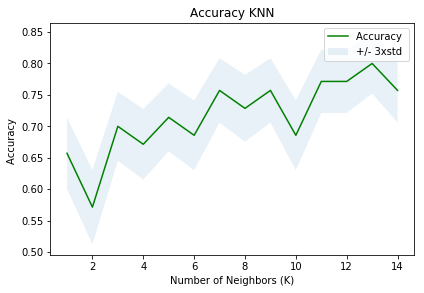

In [73]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)
best_K = mean_acc.argmax() + 1
print( "The best accuracy was with", mean_acc.max(), "with k =", best_K)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.title("Accuracy KNN")
plt.show()

Confusion matrix, without normalization
[[ 5  7]
 [ 7 51]]


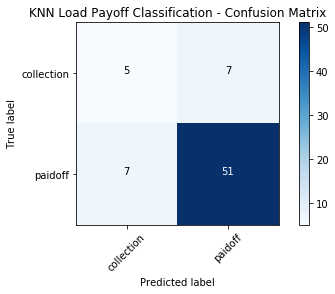

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
best_knn = KNeighborsClassifier(n_neighbors = best_K).fit(X_train,y_train)
yhat = best_knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['collection', 'paidoff'], title='KNN Load Payoff Classification - Confusion Matrix')
plt.show()

# Decision Tree

In [75]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y


Solving environment: ...working... 
  - anaconda::ca-certificates-2019.1.23-0, anaconda::openssl-1.1.1b-he774522_1
  - anaconda::openssl-1.1.1b-he774522_1, defaults::ca-certificates-2019.1.23-0
  - anaconda::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1
  - defaults::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1done

## Package Plan ##

  environment location: C:\Users\John\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.6.14               |           py37_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                  

[0.71 0.8  0.73 0.74 0.73 0.73 0.66 0.69 0.69 0.69 0.69 0.69 0.69 0.69
 0.69 0.69]
The best accuracy was with 0.8 , depth = 5


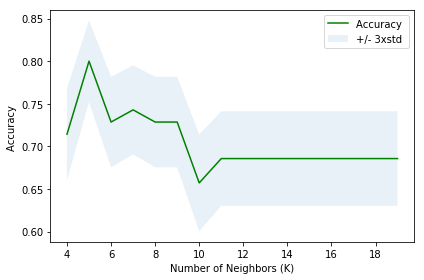

In [76]:

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

Dt_Ns = 20
offset = 4
mean_acc = np.zeros((Dt_Ns - offset))
std_dt = np.zeros((Dt_Ns - offset))
Dt_r = range(offset, Dt_Ns)
for n_depth in Dt_r:
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n_depth).fit(X_train, y_train)
    yhatTree = loanTree.predict(X_test)
    mean_acc[n_depth - offset] = metrics.accuracy_score(y_test, yhatTree)
    std_dt[n_depth - offset] = np.std(yhatTree==y_test)/np.sqrt(yhatTree.shape[0])
print(mean_acc)
best_Dt_Ns = mean_acc.argmax() + offset
print( "The best accuracy was with", mean_acc.max(), ", depth =", best_Dt_Ns)

plt.plot(Dt_r, mean_acc, 'g')
plt.fill_between(Dt_r, mean_acc - 1 * std_dt, mean_acc + 1 * std_dt, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [77]:

best_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
best_dt.fit(X_train,y_train)
yhatTree = best_dt.predict(X_test)
best_mean_acc = metrics.accuracy_score(y_test, yhatTree)
print(best_mean_acc)

0.8


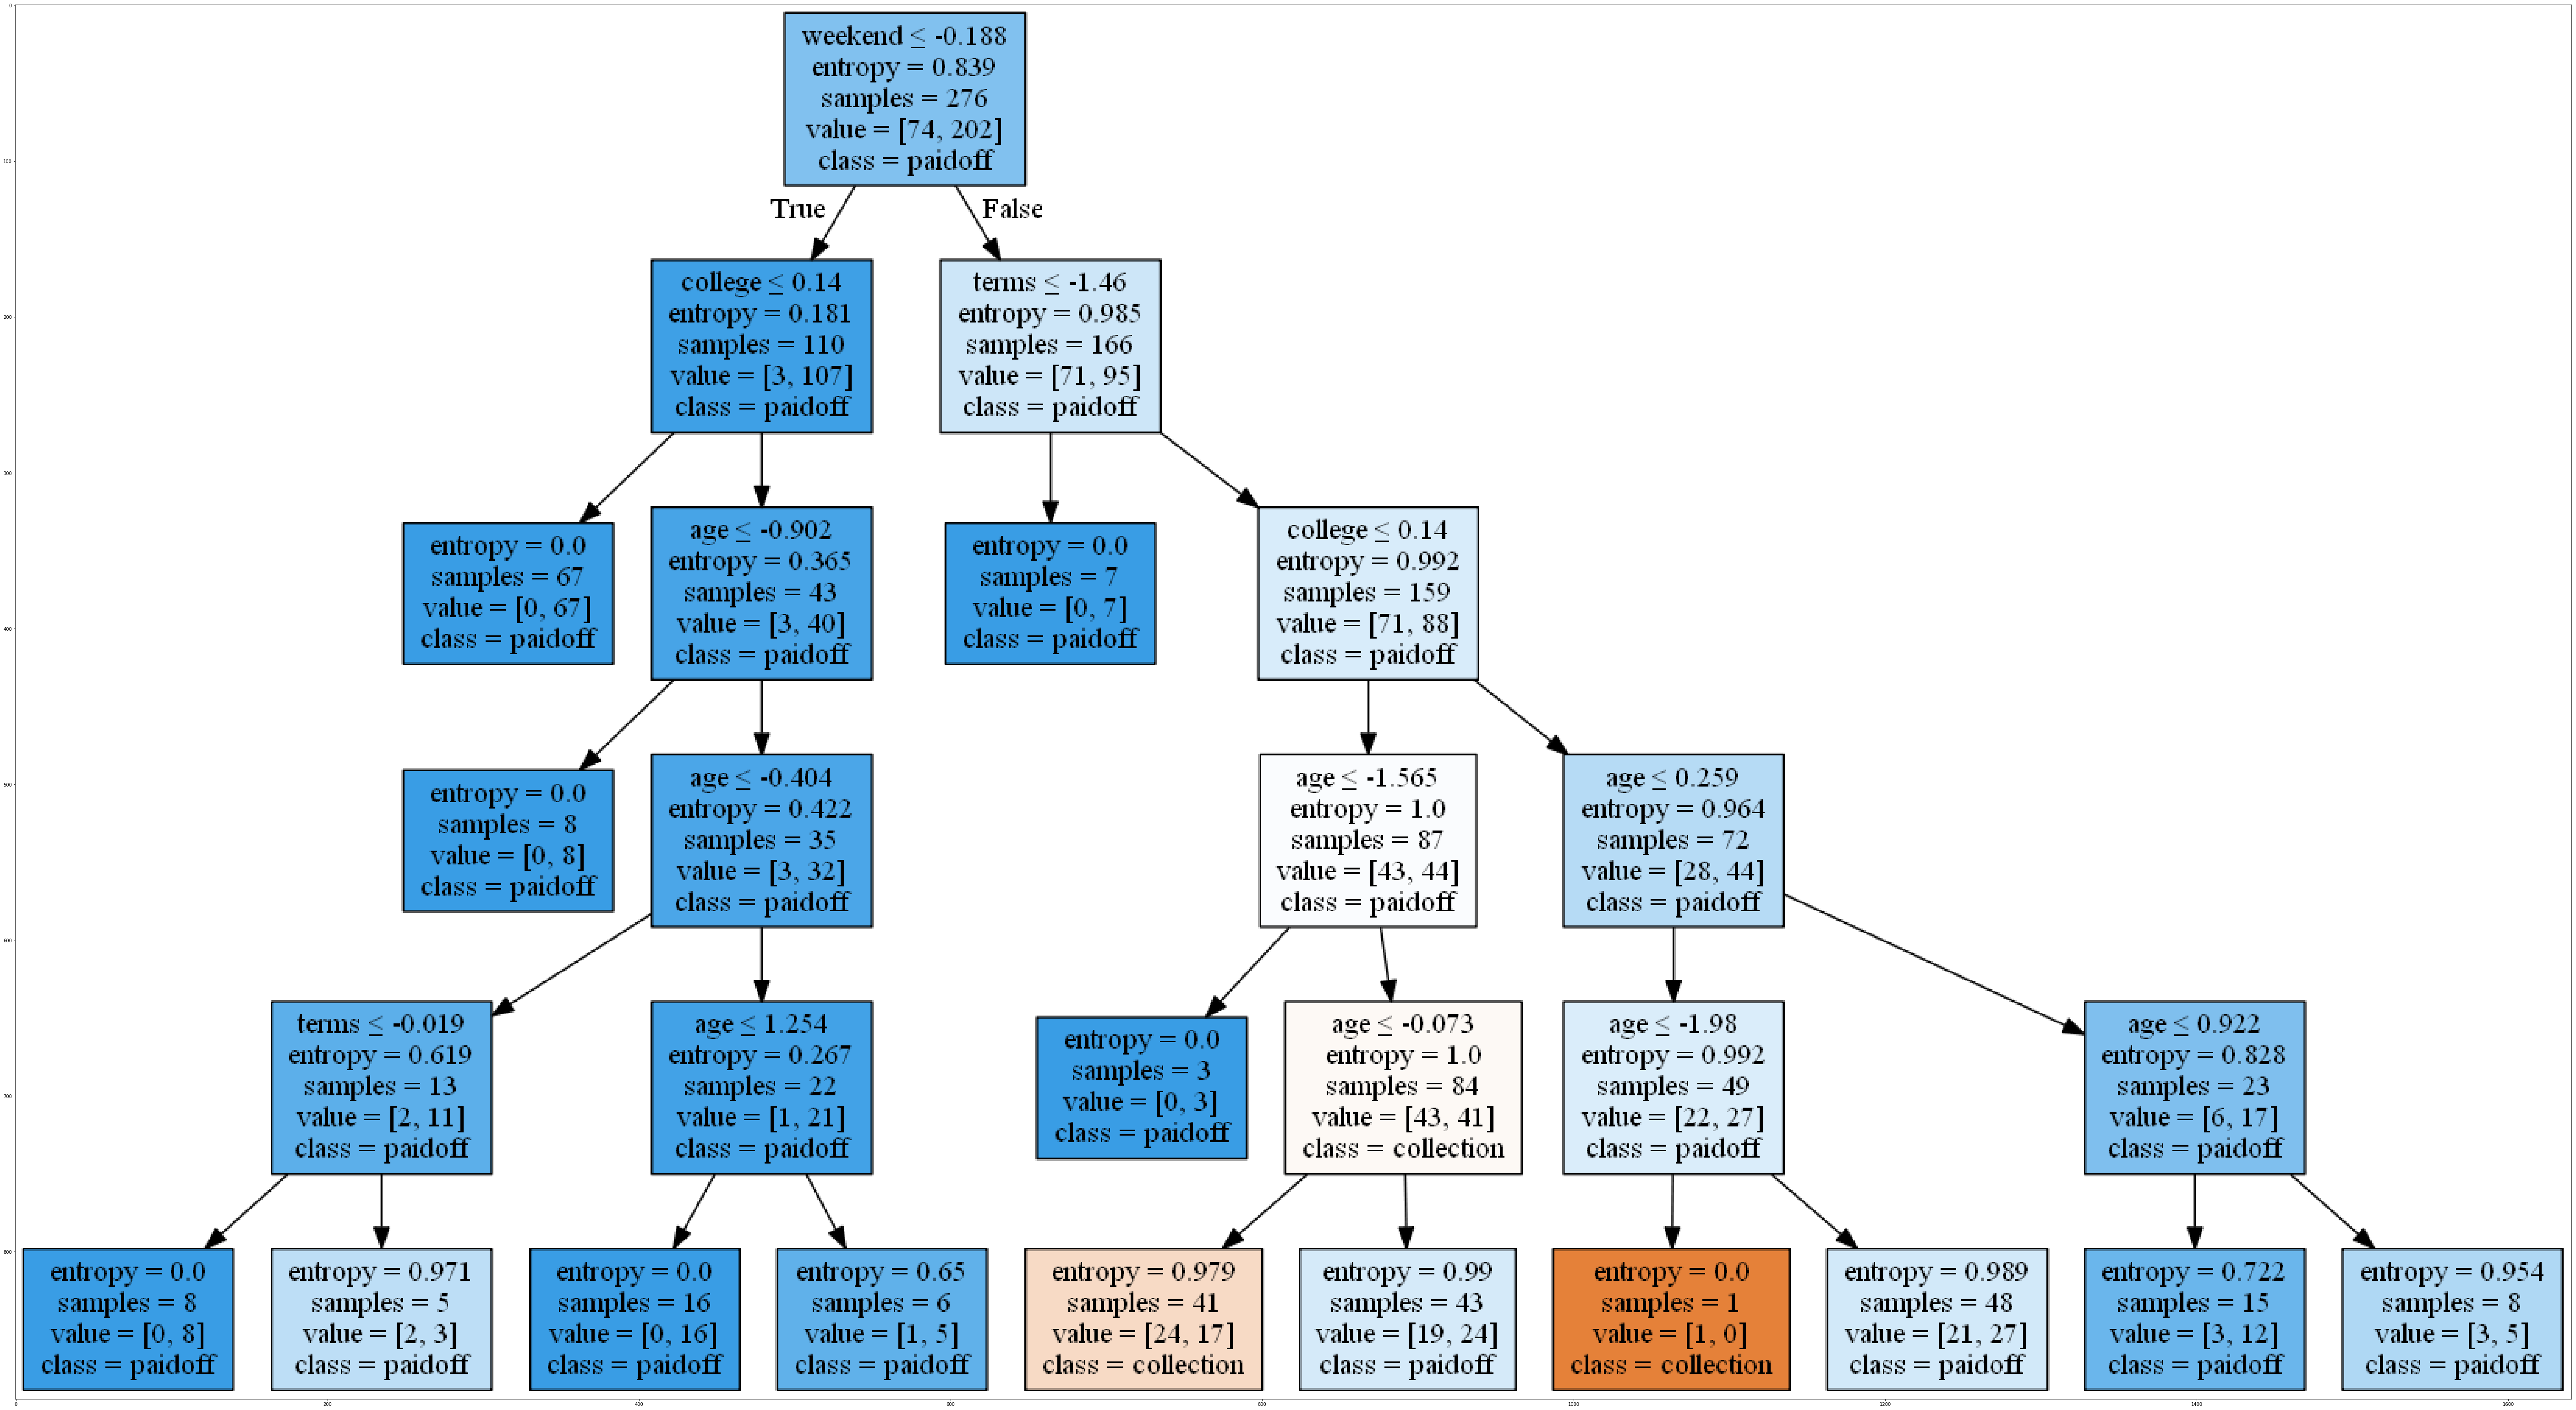

In [78]:

dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(best_dt,feature_names=featureNames, out_file=dot_data, class_names= np.unique(['collection', 'paidoff']), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

Confusion matrix, without normalization
[[ 4  8]
 [ 6 52]]


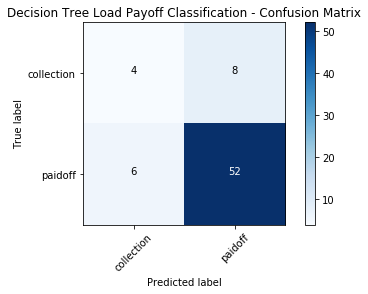

In [79]:
cnf_matrix = confusion_matrix(y_test, yhatTree)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['collection', 'paidoff'], title='Decision Tree Load Payoff Classification - Confusion Matrix')
plt.show()

# Support Vector Machine

In [80]:
from sklearn import svm

kernels = ['linear', 'rbf', 'sigmoid']
mean_acc = np.zeros((len(kernels)))
for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[kernels.index(kernel)] = metrics.accuracy_score(y_test, yhat)
best_kernel = kernels[mean_acc.argmax()]
print( "The best accuracy was with", mean_acc.max(), ", kernel =", best_kernel)

The best accuracy was with 0.8428571428571429 , kernel = sigmoid


C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [91]:
C_range = np.arange(0.1, 2.0, 0.01)
mean_acc = np.zeros(len(C_range))
std_svm = np.zeros(len(C_range))
for n, c in enumerate(C_range):
    clf = svm.SVC(C=c, kernel='sigmoid')
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    std_svm[n] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
best_c = C_range[mean_acc.argmax()]
print( "The best accuracy was with", mean_acc.max(), ", kernel =", best_kernel, ", c = ", best_c)

C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

The best accuracy was with 0.8571428571428571 , kernel = sigmoid , c =  1.0499999999999996


C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

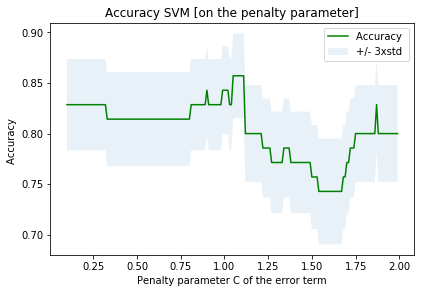

In [92]:

plt.plot(C_range, mean_acc,'g')
plt.fill_between(C_range, mean_acc - 1 * std_svm, mean_acc + 1 * std_svm, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Penalty parameter C of the error term')
plt.tight_layout()
plt.title("Accuracy SVM [on the penalty parameter]")
plt.show()

Best accuracy:  0.8571428571428571
Confusion matrix, without normalization
[[ 3  9]
 [ 1 57]]


C:\Users\John\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


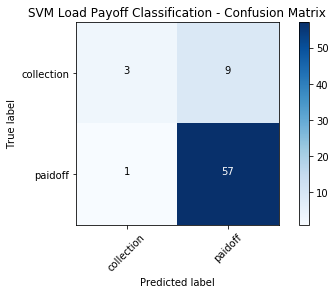

In [93]:

best_svc = svm.SVC(C=best_c, kernel='sigmoid')
best_svc.fit(X_train, y_train)
yhat = best_svc.predict(X_test)
print("Best accuracy: ", metrics.accuracy_score(y_test, yhat))
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['collection', 'paidoff'], title='SVM Load Payoff Classification - Confusion Matrix')
plt.show()

# Logistic Regression

In [94]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [95]:
C_range = np.linspace(.01, 1., 10, dtype=float)/10
mean_acc = np.zeros(len(C_range))
std_lr = np.zeros(len(C_range))
print(C_range)
for n, c in enumerate(C_range):
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    std_lr[n] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
best_c = mean_acc.argmax()
print( "The best accuracy was with", mean_acc.max(), ", c =", C_range[best_c])

[0.   0.01 0.02 0.03 0.04 0.06 0.07 0.08 0.09 0.1 ]
The best accuracy was with 0.8285714285714286 , c = 0.023


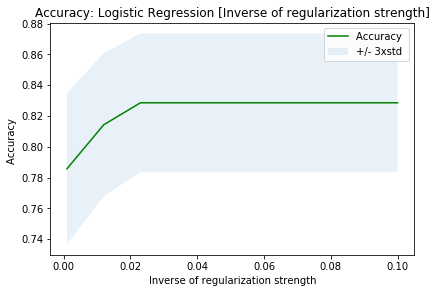

In [96]:

plt.plot(C_range, mean_acc,'g')
plt.fill_between(C_range, mean_acc - 1 * std_lr, mean_acc + 1 * std_lr, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Inverse of regularization strength')
plt.tight_layout()
plt.title("Accuracy: Logistic Regression [Inverse of regularization strength]")
plt.show()

Best accuracy  0.8285714285714286
Jaccard 0.8285714285714286
LogLoss 0.47805677182793876
F1-Score 0.90625
Confusion matrix, without normalization
[[ 0 12]
 [ 0 58]]


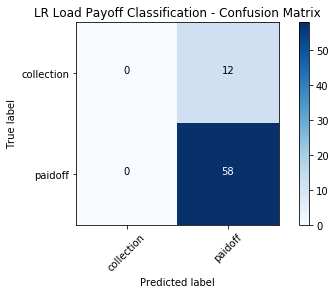

In [97]:

best_lr = LogisticRegression(C=C_range[best_c], solver='liblinear').fit(X_train,y_train)
yhat = best_lr.predict(X_test)
yhat_prob = best_lr.predict_proba(X_test)
mean_acc = metrics.accuracy_score(y_test, yhat)
print("Best accuracy ", mean_acc)
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
jss = jaccard_similarity_score(y_test, yhat)
print("Jaccard", jss)
ll = log_loss(y_test, yhat_prob)
print("LogLoss", ll)
f1_s = f1_score(y_test, yhat)
print("F1-Score", f1_s)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['collection', 'paidoff'], title='LR Load Payoff Classification - Confusion Matrix')
plt.show()


# Model Evaluation using Test set

In [98]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [99]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
df_test = pd.read_csv(path) 


### Load Test set for evaluation 

In [100]:

df_test.dropna(axis=1)
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [101]:
df_test.rename(columns={'Principal':'principal', 'Gender':'gender'}, inplace=True)
df_test['loan_status'] = df_test['loan_status'].apply(lambda x: x.lower() if isinstance(x, object) else x)
df_test['education'] = df_test['education'].apply(lambda x: x.lower() if isinstance(x, object) else x)
df_test['education'] = df_test['education'].apply(lambda x: 'bachelor' if x == 'bechalor' else x)
df_test['due_date']=pd.to_datetime(df_test['due_date'])
df_test['effective_date']=pd.to_datetime(df_test['effective_date'])
df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
df_test['weekend']= df_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_test['gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,1,1,paidoff,1000,30,2016-09-08,2016-10-07,50,bachelor,1,3,0
1,5,5,paidoff,300,7,2016-09-09,2016-09-15,35,master or above,0,4,1
2,21,21,paidoff,1000,30,2016-09-10,2016-10-09,43,high school or below,1,5,1
3,24,24,paidoff,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,paidoff,800,15,2016-09-11,2016-09-25,29,bachelor,0,6,1


In [102]:
Feature_test=df_test[['principal','terms','age','gender','weekend']]
Feature_test=pd.concat([Feature_test, pd.get_dummies(df_test['education'])], axis=1)
Feature_test.drop(['master or above'], axis = 1, inplace=True)
Feature_test.head()

,principal,terms,age,gender,weekend,bachelor,college,high school or below
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,0,1
3,1000,30,26,0,1,0,1,0
4,800,15,29,0,1,1,0,0


In [103]:
X_test = Feature_test
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
y_test = df_test['loan_status'].values
y_test = np.asarray(df_test['loan_status'].apply(lambda x: 1 if x == 'paidoff' else 0))

C:\Users\John\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [104]:

df_Results = pd.DataFrame(np.arange(16).reshape(4,4), columns=['Algorithm','Jaccard','F1-score','LogLoss'], index=None)

In [105]:
knn_yhat = best_knn.predict(X_test)
knn_jss = jaccard_similarity_score(y_test, knn_yhat)
knn_f1 = f1_score(y_test, knn_yhat)
df_Results.loc[0] = ['KNN', knn_jss, knn_f1, 'N/A']
print("KNN JACCARD SIMILARITY SCORE : ", knn_jss)
print("KNN F1-SCORE                 : ", knn_f1)

KNN JACCARD SIMILARITY SCORE :  0.7222222222222222
KNN F1-SCORE                 :  0.8275862068965516


In [106]:
dt_yhat = best_dt.predict(X_test)
dt_jss = jaccard_similarity_score(y_test, dt_yhat)
dt_f1 = f1_score(y_test, dt_yhat)
df_Results.loc[1] = ['Decision Tree', dt_jss, dt_f1, 'N/A']
print("DECISION TREE JACCARD SIMILARITY SCORE : ", knn_jss)
print("DECISION TREE F1-SCORE                 : ", knn_f1)

DECISION TREE JACCARD SIMILARITY SCORE :  0.7222222222222222
DECISION TREE F1-SCORE                 :  0.8275862068965516


In [107]:
svc_yhat = best_svc.predict(X_test)
svc_jss = jaccard_similarity_score(y_test, svc_yhat)
svc_f1 = f1_score(y_test, svc_yhat)
df_Results.loc[2] = ['SVM', svc_jss, svc_f1, 'N/A']
print("SVM JACCARD SIMILARITY SCORE : ", knn_jss)
print("SVM F1-SCORE                 : ", knn_f1)

SVM JACCARD SIMILARITY SCORE :  0.7222222222222222
SVM F1-SCORE                 :  0.8275862068965516


In [108]:
lr_yhat = best_lr.predict(X_test)
lr_jss = jaccard_similarity_score(y_test, lr_yhat)
lr_f1 = f1_score(y_test, lr_yhat)
lr_yhat_prob = best_lr.predict_proba(X_test)
lr_ll = log_loss(y_test, lr_yhat_prob)
df_Results.loc[3] = ['LogisticRegression', lr_jss, lr_f1, lr_ll]
print("LOGISTIC REGRESSION JACCARD SIMILARITY SCORE : ", lr_jss)
print("LOGISTIC REGRESSION F1-SCORE                 : ", lr_f1)
print("LOGISTIC REGRESSION LOGLOSS                  : ", lr_ll)

LOGISTIC REGRESSION JACCARD SIMILARITY SCORE :  0.7407407407407407
LOGISTIC REGRESSION F1-SCORE                 :  0.851063829787234
LOGISTIC REGRESSION LOGLOSS                  :  0.5339862748386321


In [109]:

df_Results

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.722222,0.827586,N/A
1,Decision Tree,0.740741,0.837209,N/A
2,SVM,0.685185,0.808989,N/A
3,LogisticRegression,0.740741,0.851064,0.533986
